# Laboratorio 1: Regresión en California

En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "California Housing dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Carga del Conjunto de Datos

Cargamos el conjunto de datos y vemos su contenido.

In [2]:
from sklearn.datasets import fetch_california_housing
X_california, y_california = fetch_california_housing(return_X_y=True, as_frame=True)
california = fetch_california_housing()

In [3]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:

print(california['DESCR'])  # descripción del dataset
#california['feature_names'] # nombres de los atributos para cada columna de 'data'
#california['data']           # matriz con los datos de entrada (atributos)
#print(california['target']) # vector de valores a predecir

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [5]:
california['data'].shape, california['target'].shape

((20640, 8), (20640,))

## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [6]:
from sklearn.model_selection import train_test_split
X, y = california['data'], california['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

((16512, 8), (4128, 8))

In [7]:
X_california

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [8]:
y.shape

(20640,)

In [9]:
y_test.shape

(4128,)

## Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponibles para hacer la predicción?
4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?
5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

**No hace falta escribir código para responder estas preguntas.**

#### <b> ¿De qué se trata el conjunto de datos? </b>
El conjunto de datos de California Housing trata sobre los valores de las viviendas en diversas áreas de California. Fue extraído del censo en los 90's y contiene información sobre diferentes características demográficas y geográficas de estas áreas. 

#### <b> ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene? </b>
La variable objetivo a considerar en el conjunto de datos de California Housing es MedHouseVal y representa el valor medio de las casas en una zona determinada, expresado en cientos de miles de dólares (\\$100.000), lo cual significa que, si la variable objetivo tiene el valor de 3, significa que el valor medio de las casas en la zona específica será de \\$300.000.

#### <b> ¿Qué información (atributos) hay disponibles para hacer la predicción? </b>
Los atributos o variables disponibles son los siguientes:

<b>MedInc:</b> Ingreso medio de los hogares en la zona (en decenas de miles de dólares). Indica el nivel de ingresos de los residentes.

<b>HouseAge:</b> Edad promedio de las casas en la zona (en años). Refleja cuán nuevas o antiguas son las viviendas.

<b>AveRooms:</b> Número promedio de habitaciones por hogar. Proporciona una idea del tamaño de las casas.

<b>AveBedrms:</b> Número promedio de dormitorios por hogar. Informa sobre el número de dormitorios en las viviendas.

<b>Population:</b> Población total de la zona. Indica cuántas personas viven en la zona.

<b>AveOccup:</b> Promedio de ocupantes por hogar. Muestra cuántas personas, en promedio, viven en cada hogar.

<b>Latitude:</b> Latitud de la zona. Indica la posición geográfica en términos de latitud.

<b>Longitude:</b> Longitud de la zona. Indica la posición geográfica en términos de longitud.

#### <b> ¿Qué atributos imagina ud. que serán los más determinantes para la predicción? </b>
Los más determinantes podrían ser <b>MedInc</b>, <b>HouseAge</b>, <b>AveRooms</b> y <b>AveBedrms</b>, ya que indicarían el nivel de ingresos de los residentes, cuán antiguas son las viviendas y, además, el tamaño de estas. Esto no significa que los atributos restantes no influyan en la predicción.

#### <b> ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras. </b>



## Ejercicio 2: Visualización de los Datos

1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.
3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

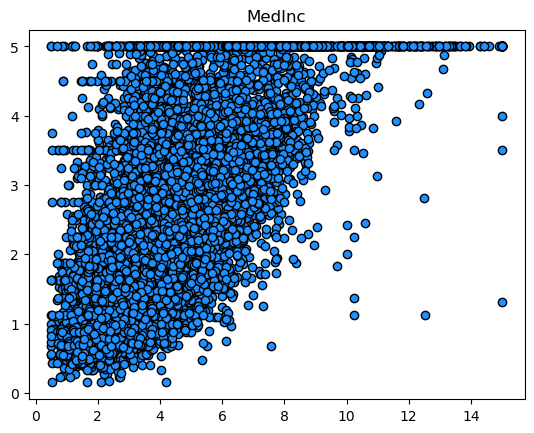

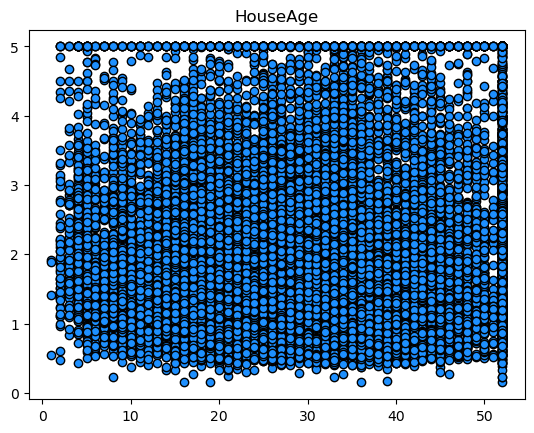

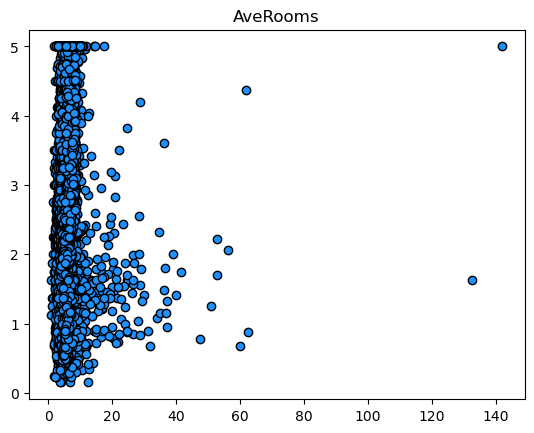

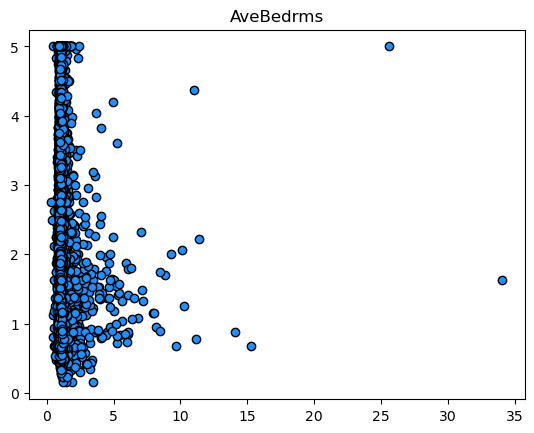

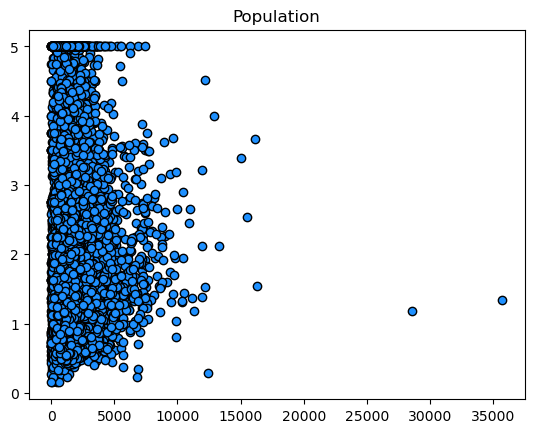

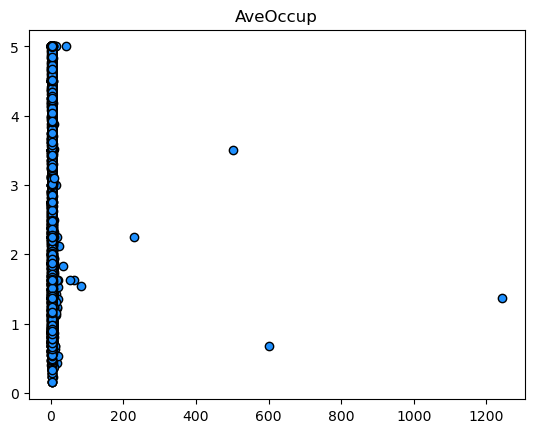

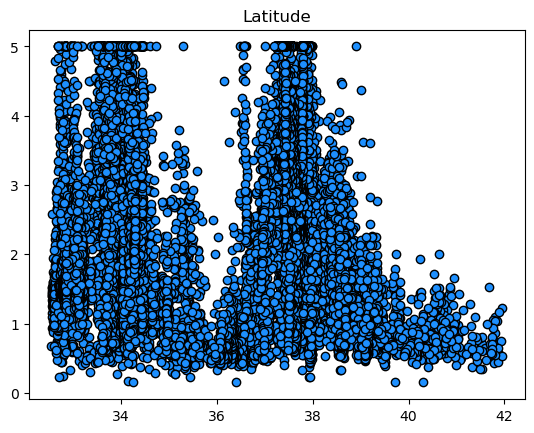

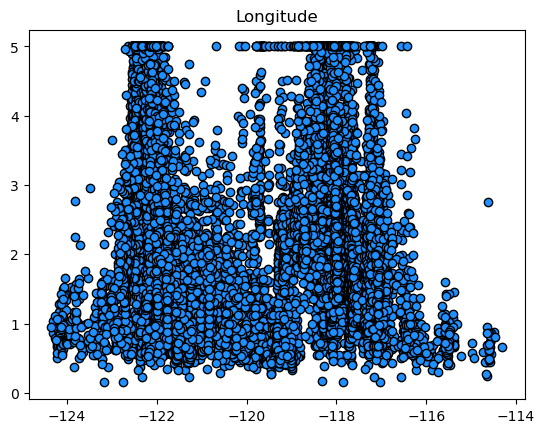

In [10]:
# 1. Resolver acá. Ayuda/ejemplo:
features = california.feature_names
#selector = california['feature_names'].index(feature)
for feature in features:
    selector = (np.array(features) == feature)
    plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
    plt.title(feature)
    plt.show()

In [11]:
california['feature_names'][1] == feature

False

<b> Estudie las gráficas, identificando a ojo los atributos que a su criterio sean los más informativos para la predicción. </b>


<b>MedInc</b> (Ingreso medio de los hogares) es probablemente el atributo más relevante, ya que tiende a evidenciar la conexión positiva más clara en relación al valor de la vivienda y el ingreso promedio.

## Ejercicio 3: Regresión Lineal

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

In [12]:
# 1. Resolver acá. Ayuda:
feature = 'MedInc'  # selecciono el atributo 'HouseAge'
#selector = california['feature_names'].index(feature)
selector = (np.array(california['feature_names']) ==  feature)
X_train_f = X_train[:, selector]
X_test_f = X_test[:, selector]
X_train_f.shape, X_test_f.shape

((16512, 1), (4128, 1))

In [13]:
X_train_f[1]

array([4.3898])

In [14]:
# 2. Instanciar y entrenar acá.
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(X_train_f, y_train)

LinearRegression()

In [15]:
# 3. Predecir y evaluar acá.
from sklearn.metrics import mean_squared_error
y_train_pred = modelo.predict(X_train_f)
y_test_pred = modelo.predict(X_test_f)

cuadratico_train = mean_squared_error(y_train, y_train_pred)
cuadratico_test = mean_squared_error(y_test, y_test_pred)

print(f'Error Cuadrático Medio en el conjunto de entrenamiento: {round(cuadratico_train, 3)}')
print(f'Error Cuadrático Medio en el conjunto de prueba: {round(cuadratico_test,3)}')

Error Cuadrático Medio en el conjunto de entrenamiento: 0.696
Error Cuadrático Medio en el conjunto de prueba: 0.721


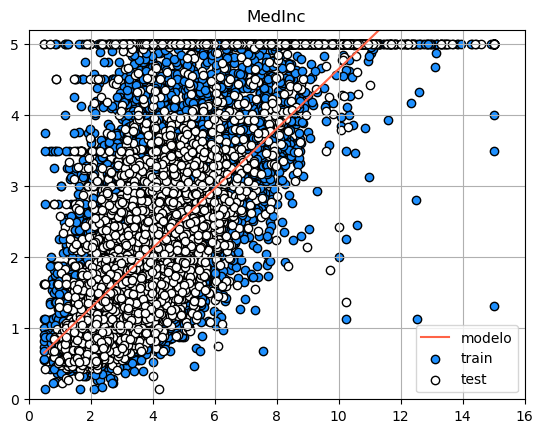

In [16]:
# 4. Graficar acá. Ayuda:
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)
plt.plot(x, modelo.predict(x), color="tomato", label="modelo")

plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
plt.xlim(0,16)
plt.ylim(0,5.2)
plt.title(feature)
plt.grid()
plt.legend()
plt.show()

## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

<b>Para varios grados de polinomio, haga lo siguiente:<b/>

    Instancie y entrene una regresión polinomial.
    Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    Guarde los errores en una lista.

In [17]:
# 1. Resolver acá.
from sklearn.preprocessing import PolynomialFeatures
feature = 'MedInc'
#selector = california['feature_names'].index(feature)
selector = (np.array(california['feature_names']) ==  feature)
X_train_f = X_train[:, selector]
X_test_f = X_test[:, selector]
X_train_f.shape, X_test_f.shape

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X_train_f.reshape(-1, 1))
poly_features_test = poly.fit_transform(X_test_f.reshape(-1, 1))
modeloPoly = LinearRegression()
modeloPoly.fit(poly_features, y_train)

y_train_predPoly = modeloPoly.predict(poly_features)
y_test_predPoly = modeloPoly.predict(poly_features_test)

cuadratico_train_Poly = mean_squared_error(y_train, y_train_predPoly)
cuadratico_test_Poly = mean_squared_error(y_test, y_test_predPoly)

print(f'Error Cuadrático Medio en el conjunto de entrenamiento: {round(cuadratico_train_Poly, 3)}')
print(f'Error Cuadrático Medio en el conjunto de prueba: {round(cuadratico_test_Poly, 3)}')

Error Cuadrático Medio en el conjunto de entrenamiento: 0.689
Error Cuadrático Medio en el conjunto de prueba: 0.717


<b>Grafique las curvas de error en términos del grado del polinomio.</b>

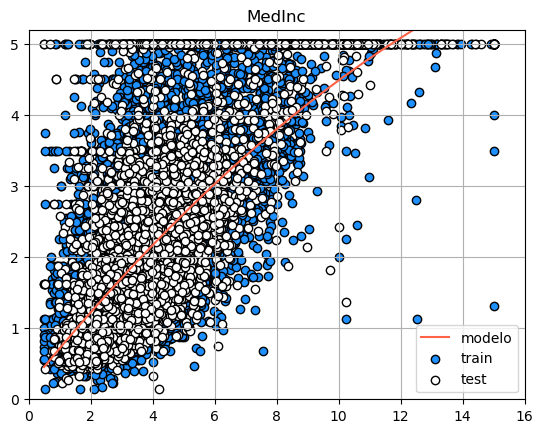

In [18]:
# 2. Graficar curvas de error acá.
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)
x_poly = poly.transform(x)

plt.plot(x, modeloPoly.predict(x_poly), color="tomato", label="modelo")
plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
plt.xlim(0, 16)
plt.ylim(0, 5.2)
plt.title(feature)
plt.grid()
plt.legend()
plt.show()

<b>Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.</b>

La curva sigue la tendencia general de los datos de manera suave, sin demasiadas oscilaciones. Esto indica que el modelo no está demasiado ajustado a los datos de entrenamiento. Este comportamiento se refleja en los valores del error cuadrático medio de los conjuntos de entrenamiento y prueba, los cuales tienen una pequeña diferencia. La proximidad de estos valores sugiere que el modelo generaliza bien a datos no vistos, y no muestra signos significativos de sobreajuste.

<b>Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.</b>

El mejor modelo es: Polinomial
Error Cuadrático Medio en el conjunto de entrenamiento (Polinomial): 0.689
Error Cuadrático Medio en el conjunto de prueba (Polinomial): 0.717


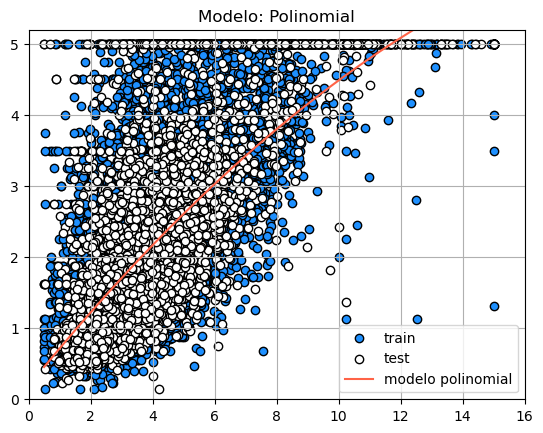

In [19]:
# 4. Reconstruir mejor modelo acá y graficar.
if cuadratico_test_Poly < cuadratico_test:
    mejor_modelo = 'Polinomial'
    mejor_ecm_train = cuadratico_train_Poly
    mejor_ecm_test = cuadratico_test_Poly
else:
    mejor_modelo = 'Lineal'
    mejor_ecm_train = cuadratico_train
    mejor_ecm_test = cuadratico_test

print(f'El mejor modelo es: {mejor_modelo}')
print(f'Error Cuadrático Medio en el conjunto de entrenamiento ({mejor_modelo}): {round(mejor_ecm_train, 3)}')
print(f'Error Cuadrático Medio en el conjunto de prueba ({mejor_modelo}): {round(mejor_ecm_test, 3)}')

x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)

plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")

if mejor_modelo == 'Polinomial':
    x_poly = poly.transform(x)
    plt.plot(x, modeloPoly.predict(x_poly), color="tomato", label="modelo polinomial")
else:
    plt.plot(x, modelo.predict(x), color="tomato", label="modelo lineal")

plt.xlim(0, 16)
plt.ylim(0, 5.2)
plt.title(f'Modelo: {mejor_modelo}')
plt.grid()
plt.legend()
plt.show()

Otra forma de saber que modelo funciona mejor es calculando la medida <b>R²</b>.

In [20]:
from sklearn.metrics import r2_score
r2_train_Lineal = r2_score(y_train, y_train_pred)
r2_test_Lineal = r2_score(y_test, y_test_pred)
r2_train_Poly = r2_score(y_train, y_train_predPoly)
r2_test_Poly = r2_score(y_test, y_test_predPoly)

print(f'R2 train lineal: {round(r2_train_Lineal, 3)}\nR2 test lineal: {round(r2_test_Lineal, 3)}')
print(f'R2 train poly: {round(r2_train_Poly, 3)}\nR2 test poly: {round(r2_test_Poly, 3)}')

R2 train lineal: 0.48
R2 test lineal: 0.447
R2 train poly: 0.485
R2 test poly: 0.45


El modelo de regresión polinomial tiene un R² ligeramente mayor tanto en el conjunto de entrenamiento como en el conjunto de prueba en comparación con el modelo de regresión lineal simple. Por lo tanto, aunque ambos modelos tienen un desempeño similar, el modelo de regresión polinomial es elegido por su rendimiento ligeramente superior en términos de R².

<b>Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.</b>

El modelo de regresión polinomial, aunque mejora solo marginalmente el R² tanto en el conjunto de entrenamiento como en el de prueba, es ligeramente superior en términos de ajuste. Esta pequeña mejora sugiere que el modelo polinomial puede capturar mejor las complejidades en la relación entre los ingresos medios y los precios de las viviendas, proporcionando un ajuste un poco más preciso a los datos observados.

## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

In [21]:
# 1. Resolver acá. Ayuda (con dos atributos):
selector = (np.array(california['feature_names']) == 'MedInc') | \
(np.array(california['feature_names']) == 'AveRooms') | \
(np.array(california['feature_names']) == 'Population')

X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
X_train_fs.shape, X_test_fs.shape

((16512, 3), (4128, 3))

In [22]:
poly_f = PolynomialFeatures(degree=3, include_bias=False)
poly_features = poly_f.fit_transform(X_train_fs)
poly_features_test = poly_f.fit_transform(X_test_fs)

modelo_poly = LinearRegression()
modelo_poly.fit(poly_features, y_train)

y_train_pred_poly = modelo_poly.predict(poly_features)
y_test_pred_poly = modelo_poly.predict(poly_features_test)

cuadratico_train_poly = mean_squared_error(y_train, y_train_pred_poly)
cuadratico_test_poly = mean_squared_error(y_test, y_test_pred_poly)
r2_train_poly = r2_score(y_train, y_train_pred_poly)
r2_test_poly = r2_score(y_test, y_test_pred_poly)

print(f'Error Cuadrático Medio en el conjunto de entrenamiento: {round(cuadratico_train_poly, 3)}')
print(f'Error Cuadrático Medio en el conjunto de prueba: {round(cuadratico_test_poly, 3)}')
print(f'R2 entrenamiento: {round(r2_train_poly, 3)}\nR2 prueba: {round(r2_test_poly, 3)}')

Error Cuadrático Medio en el conjunto de entrenamiento: 0.612
Error Cuadrático Medio en el conjunto de prueba: 0.633
R2 entrenamiento: 0.542
R2 prueba: 0.515


<b>Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?</b>

## Más ejercicios (opcionales)

### Ejercicio 6: A Todo Feature

Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.




In [25]:
modelo_todo = LinearRegression()
modelo.fit(X_train, y_train)

y_train_pred = modelo.predict(X_train)
y_test_pred = modelo.predict(X_test)

cuadratico_train = mean_squared_error(y_train, y_train_pred)
cuadratico_test = mean_squared_error(y_test, y_test_pred)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Error Cuadrático Medio:\nEntrenamiento: {round(cuadratico_train, 3)} \nPrueba: {round(cuadratico_test, 3)}')
print(f'Coeficiente de Determinación:\nEntrenamiento: {round(r2_train, 3)}\nPrueba: {round(r2_test, 3)}')

Error Cuadrático Medio:
Entrenamiento: 0.523 
Prueba: 0.529
Coeficiente de Determinación:
Entrenamiento: 0.609
Prueba: 0.594


In [54]:
modelo_todo = LinearRegression()
poly_todo = PolynomialFeatures(include_bias=False)
poly_features = poly_todo.fit_transform(X_train)
poly_features_test = poly_todo.transform(X_test)
modelo_todo.fit(poly_features, y_train)

y_train_pred = modelo_todo.predict(poly_features)
y_test_pred = modelo_todo.predict(poly_features_test)

cuadratico_train = mean_squared_error(y_train, y_train_pred)
cuadratico_test = mean_squared_error(y_test, y_test_pred)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Error Cuadrático Medio:\nEntrenamiento: {round(cuadratico_train, 3)} \nPrueba: {round(cuadratico_test, 3)}')
print(f'Coeficiente de Determinación:\nEntrenamiento: {round(r2_train, 3)}\nPrueba: {round(r2_test, 3)}')

ValueError: X has 1 features, but PolynomialFeatures is expecting 8 features as input.

In [49]:
print(X_test.flatten().shape)
print(y_test_pred.shape)

(33024,)
(4128,)


ValueError: x and y must be the same size

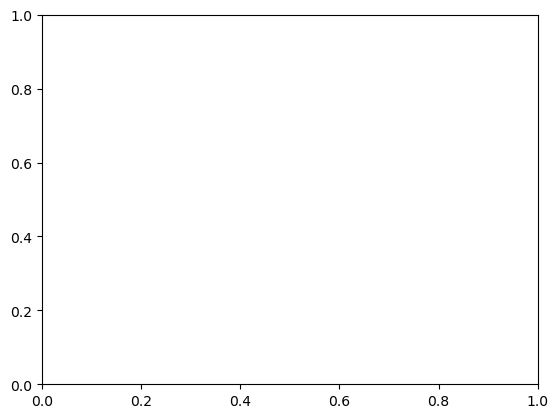

In [39]:
plt.scatter(X_test.flatten(), y_test, color='blue', label='Datos reales')

# Graficar las predicciones del modelo
plt.plot(X_test.flatten(), y_test_pred, color='red', linewidth=2, label='Predicciones')

plt.xlabel('X_test')
plt.ylabel('y')
plt.title('Comparación de Datos Reales vs Predicciones')
plt.legend()
plt.grid(True)
plt.show()

### Ejercicio 7: Regularización

Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?